In [239]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import gc

# 1) ÌöåÏõêÏ†ïÎ≥¥ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
member_paths = [
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201807_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201808_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201809_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201810_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201811_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
]

# 2) ÌöåÏõêÏ†ïÎ≥¥ ÌÜµÌï© Î∞è ÏÑ∏Í∑∏Î®ºÌä∏ Ïù∏ÏΩîÎî©
df_members = pd.concat([pd.read_parquet(p)[['ID', 'Segment']] for p in member_paths])
le = LabelEncoder()
df_members['Segment_code'] = le.fit_transform(df_members['Segment'])

# 3) Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌååÏùºÍ≥º Ïª¨Îüº
file_columns = {
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201807_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201808_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201809_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201810_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201811_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201807_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201808_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201809_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201810_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201811_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201812_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/train/4.Ï≤≠Íµ¨ÏûÖÍ∏àÏ†ïÎ≥¥/201812_train_Ï≤≠Íµ¨Ï†ïÎ≥¥.parquet": [
        'ID', 'Ï≤≠Íµ¨Í∏àÏï°_R6M'
    ],
    "open/train/5.ÏûîÏï°Ï†ïÎ≥¥/201812_train_ÏûîÏï°Ï†ïÎ≥¥.parquet": [
        'ID', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M'
    ]
}

# 4) Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
data_chunks = []
for path, cols in file_columns.items():
    df = pd.read_parquet(path, columns=cols)
    if data_chunks:
        existing_cols = set().union(*[set(d.columns) for d in data_chunks])
        overlap = [col for col in df.columns if col in existing_cols and col != 'ID']
        df = df.drop(columns=overlap)
    data_chunks.append(df)

data_merged = data_chunks[0]
for df in data_chunks[1:]:
    data_merged = pd.merge(data_merged, df, on='ID', how='inner')

# 5) ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
data_merged['ÌèâÍ∑†_ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä'] = data_merged['Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M'] / (data_merged['Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'] + 1)
data_merged['ÏûÖÍ∏àÎåÄÎπÑÏ≤≠Íµ¨ÎπÑÏú®_ÌòÑÏõî'] = data_merged['Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M'] / (data_merged['Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M'] + 1)

# 6) ÌöåÏõêÏ†ïÎ≥¥ Î≥ëÌï©
full_df = pd.merge(data_merged, df_members[['ID', 'Segment_code']], on='ID', how='inner')

# 7) Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
full_df.rename(columns={
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨': 'ÏÇ¨Ïö©Í∏àÏï°_Ïã†Ïö©Ï≤¥ÌÅ¨_3M',
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©': 'ÏÇ¨Ïö©Í∏àÏï°_Ïã†Ïö©_3M',
    '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°': 'ÏµúÏö∞ÏÑ†Ïπ¥Îìú_ÏÇ¨Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M': 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_ÌòÑÏõî',
    'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M': 'ÏùºÏãúÎ∂à_ÏÇ¨Ïö©Í∏àÏï°_ÌòÑÏõî',
    'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M': 'Ïò§ÌîÑÎùºÏù∏_ÏÇ¨Ïö©Í∏àÏï°_ÌòÑÏõî',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M': 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_ÌòÑÏõî',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M': 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_2Í∞úÏõîÏ†Ñ',
    'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M': 'ÏµúÎåÄÏùºÏãúÎ∂àÏÇ¨Ïö©Í∏àÏï°_12M',
    'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M': 'ÏùºÏãúÎ∂à_Ïù¥Ïö©Í±¥Ïàò_ÌòÑÏõî',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M': 'Ï≤≠Íµ¨Í∏àÏï°_Ìï©Í≥Ñ_6M',
    'ÌèâÏûî_ÏùºÏãúÎ∂à_6M': 'ÌèâÍ∑†ÏûîÏï°_ÏùºÏãúÎ∂à_6M',
    'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M': 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_ÌòÑÏõî',
    'ÏûîÏï°_Ìï†Î∂Ä_B0M': 'Ìï†Î∂ÄÏûîÏï°_ÌòÑÏõî',
}, inplace=True)

# 8) Ï∂îÍ∞Ä ÌååÏÉùÎ≥ÄÏàò (Í∞ÄÏÑ§ Í∏∞Î∞ò)
full_df['Ïπ¥ÎìúÏÇ¨Ïö©ÏßëÏ§ëÎèÑ'] = full_df['ÏµúÏö∞ÏÑ†Ïπ¥Îìú_ÏÇ¨Ïö©Í∏àÏï°'] / (full_df['ÏÇ¨Ïö©Í∏àÏï°_Ïã†Ïö©_3M'] + 1)
# -> 1ÏàúÏúÑ Ïπ¥ÎìúÏóê Í≥ºÎèÑÌïòÍ≤å ÏßëÏ§ëÎêú Í≥†Í∞ùÏùÄ ÏúÑÌóòÎèÑ ÎòêÎäî ÏÑ∏Í∑∏Î®ºÌä∏ ÏòÅÌñ•

full_df['ÏùºÏãúÎ∂à_ÌèâÍ∑†ÏÇ¨Ïö©Í∏àÏï°_ÎåÄÎπÑ_ÏµúÎåÄÏÇ¨Ïö©Í∏àÏï°ÎπÑÏú®'] = \
    full_df['ÌèâÍ∑†_ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä'] / (full_df['ÏµúÎåÄÏùºÏãúÎ∂àÏÇ¨Ïö©Í∏àÏï°_12M'] + 1)
# -> ÏµúÎåÄ ÏùºÏãúÎ∂à ÏÇ¨Ïö© ÎåÄÎπÑ Í±¥Îãπ Îã®Í∞Ä ÎπÑÏú®Î°ú ÏÜåÎπÑ Ìå®ÌÑ¥ Î≥ÄÌôî Í∞êÏßÄ

full_df['ÏûÖÍ∏àÎ≥ÄÎèôÎ•†'] = \
    (full_df['Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_ÌòÑÏõî'] - full_df['Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_2Í∞úÏõîÏ†Ñ']) / (full_df['Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_2Í∞úÏõîÏ†Ñ'] + 1)
# -> ÏûÖÍ∏àÏï° Ï¶ùÍ∞êÏúºÎ°ú ÏÉÅÌôòÎä•Î†• ÏòàÏ∏° (ÏùåÏàòÎ©¥ ÏûÖÍ∏à Í∞êÏÜå, ÏñëÏàòÎ©¥ Ï¶ùÍ∞Ä)

full_df['Ïò§ÌîÑÎùºÏù∏_ÎπÑÏ§ë'] = full_df['Ïò§ÌîÑÎùºÏù∏_ÏÇ¨Ïö©Í∏àÏï°_ÌòÑÏõî'] / (full_df['ÏùºÏãúÎ∂à_ÏÇ¨Ïö©Í∏àÏï°_ÌòÑÏõî'] + 1)
# -> Ïò§ÌîÑÎùºÏù∏ ÏÜåÎπÑÍ∞Ä ÎßéÏùÄ Í≥†Í∞ùÏùÄ Ïñ¥Îñ§ ÏÑ∏Í∑∏Î®ºÌä∏Ïù∏ÏßÄ ÌôïÏù∏

# 9) inf, NaN Ï≤òÎ¶¨
full_df.replace([np.inf, -np.inf], np.nan, inplace=True)
full_df.fillna(0, inplace=True)

# 10) ÌîºÏ≤ò/ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = full_df.drop(columns=['ID', 'Segment_code'])
y = full_df['Segment_code']

# 11) Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 12) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 11) LightGBM ÌïôÏäµ
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train, feature_name=X.columns.tolist())

# 12) Ï†ÄÏû•
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'best_model.pkl')

# 13) ÌèâÍ∞Ä
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n‚úÖ Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {acc:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.722904
[LightGBM] [Info] Start training from score -2.935696
[LightGBM] [Info] Start training from score -1.927375
[LightGBM] [Info] Start training from score -0.222000

‚úÖ Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.8566


### ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ ÏúÑÌïú optuna ÌäúÎãù

In [3]:
!pip install optuna

In [253]:
import optuna
import lightgbm as lgb
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# 1. ÏÑúÎ∏å ÌïôÏäµ/Í≤ÄÏ¶ùÏÖã ÎÇòÎàÑÍ∏∞
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 2. objective Ìï®Ïàò Ï†ïÏùò (f1_macro Í∏∞Ï§ÄÏúºÎ°ú Î≥ÄÍ≤Ω)
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 64),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15),
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_subtrain, y_subtrain)
    preds = model.predict(X_valid)

    # f1_macro Í≥ÑÏÇ∞
    f1 = f1_score(y_valid, preds, average='macro')
    return f1

# 3. Optuna ÌäúÎãù (10ÌöåÎßå ÏßÑÌñâÌï¥ÎèÑ Ï∂©Î∂Ñ)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\n‚úÖ Best f1_macro from tuning:", study.best_value)
print("‚úÖ Best Parameters:", study.best_params)

# 5. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
best_model = lgb.LGBMClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è f1/Ï†ïÌôïÎèÑ Ï∂úÎ†•
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score

print(f"\nüéØ Ï†ïÌôïÎèÑ: {accuracy_score(y_test, y_pred):.8f}")
print("\nüìä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ (macro Í∏∞Î∞ò f1-score Ìè¨Ìï®):")
print(classification_report(y_test, y_pred, digits=4))

[I 2025-07-04 15:37:21,189] A new study created in memory with name: no-name-e82d6ec2-d9ef-42f2-9789-5f2a312e2838


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:37:59,156] Trial 0 finished with value: 0.4560727140440267 and parameters: {'num_leaves': 20, 'max_depth': 5, 'learning_rate': 0.09557623255788736, 'n_estimators': 136, 'subsample': 0.9537850602279765, 'colsample_bytree': 0.8569654190250993}. Best is trial 0 with value: 0.4560727140440267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:38:40,229] Trial 1 finished with value: 0.4318001926127426 and parameters: {'num_leaves': 25, 'max_depth': 9, 'learning_rate': 0.11211263360043355, 'n_estimators': 123, 'subsample': 0.8501630073415549, 'colsample_bytree': 0.9787803108593249}. Best is trial 0 with value: 0.4560727140440267.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:39:21,362] Trial 2 finished with value: 0.4980057557033132 and parameters: {'num_leaves': 27, 'max_depth': 6, 'learning_rate': 0.09516483021173316, 'n_estimators': 124, 'subsample': 0.8676450579200815, 'colsample_bytree': 0.9658482364717157}. Best is trial 2 with value: 0.4980057557033132.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:39:52,904] Trial 3 finished with value: 0.3975662000313701 and parameters: {'num_leaves': 41, 'max_depth': 3, 'learning_rate': 0.10121569968044003, 'n_estimators': 143, 'subsample': 0.8853325931979268, 'colsample_bytree': 0.9268512399999479}. Best is trial 2 with value: 0.4980057557033132.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:40:35,408] Trial 4 finished with value: 0.4523625865736921 and parameters: {'num_leaves': 29, 'max_depth': 9, 'learning_rate': 0.10234348452250296, 'n_estimators': 133, 'subsample': 0.8411058185423411, 'colsample_bytree': 0.969403339117824}. Best is trial 2 with value: 0.4980057557033132.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:41:22,204] Trial 5 finished with value: 0.49424104237913 and parameters: {'num_leaves': 32, 'max_depth': 7, 'learning_rate': 0.092004839383237, 'n_estimators': 132, 'subsample': 0.993648411020673, 'colsample_bytree': 0.8308125768205578}. Best is trial 2 with value: 0.4980057557033132.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:41:54,228] Trial 6 finished with value: 0.4067829600156644 and parameters: {'num_leaves': 49, 'max_depth': 3, 'learning_rate': 0.06643414252657977, 'n_estimators': 149, 'subsample': 0.800198935661372, 'colsample_bytree': 0.8474559431130455}. Best is trial 2 with value: 0.4980057557033132.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:43:00,985] Trial 7 finished with value: 0.5429084408490222 and parameters: {'num_leaves': 55, 'max_depth': 10, 'learning_rate': 0.057512704096640915, 'n_estimators': 149, 'subsample': 0.8905460540856406, 'colsample_bytree': 0.9617260594894708}. Best is trial 7 with value: 0.5429084408490222.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:43:47,721] Trial 8 finished with value: 0.5064163003372281 and parameters: {'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.07456509259037415, 'n_estimators': 127, 'subsample': 0.8043686704370481, 'colsample_bytree': 0.9572167822232729}. Best is trial 7 with value: 0.5429084408490222.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1536000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.659725
[LightGBM] [Info] Start training from score -2.934213
[LightGBM] [Info] Start training from score -1.928134
[LightGBM] [Info] Start training from score -0.221965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-07-04 15:44:37,149] Trial 9 finished with value: 0.5067304611168112 and parameters: {'num_leaves': 46, 'max_depth': 8, 'learning_rate': 0.07118535678424258, 'n_estimators': 127, 'subsample': 0.8829102015373188, 'colsample_bytree': 0.8992719782255012}. Best is trial 7 with value: 0.5429084408490222.



‚úÖ Best f1_macro from tuning: 0.5429084408490222
‚úÖ Best Parameters: {'num_leaves': 55, 'max_depth': 10, 'learning_rate': 0.057512704096640915, 'n_estimators': 149, 'subsample': 0.8905460540856406, 'colsample_bytree': 0.9617260594894708}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.722904
[LightGBM] [Info] Start training from score -2.935696
[LightGBM] [Info] Start training from score -1.927375
[LightGBM] [Info] Start training from score -0.222000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [255]:
# 1) OptunaÎ°ú Í∞ÄÏ§ëÏπò ÏóÜÏù¥ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
best_model = lgb.LGBMClassifier(**study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f"üéØ ÏµúÏ†Å Î™®Îç∏ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ (Í∞ÄÏ§ëÏπò ÏóÜÏùå): {accuracy_score(y_test, y_pred):.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 20
[LightGBM] [Info] Start training from score -7.821445
[LightGBM] [Info] Start training from score -9.722904
[LightGBM] [Info] Start training from score -2.935696
[LightGBM] [Info] Start training from score -1.927375
[LightGBM] [Info] Start training from score -0.222000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [257]:
# 2) ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ train Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

print(np.bincount(y_train))  # train Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπò:", class_weights_dict)

[    770     115  101940  279417 1537758]
ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπò: {0: 498.7012987012987, 1: 3339.1304347826085, 2: 3.766921718658034, 3: 1.374290039618205, 4: 0.24971419430105388}


In [247]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

print("ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπò:", class_weights_dict)

ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπò: {0: 493.82716049382714, 1: 3333.3333333333335, 2: 3.7620503174229953, 3: 1.3744051402752246, 4: 0.2497330977517778}


In [259]:
# 3) Í∞ÄÏ§ëÏπò Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è ÌèâÍ∞Ä
best_model_weighted = lgb.LGBMClassifier(**study.best_params, class_weight=class_weights_dict)
best_model_weighted.fit(X_train, y_train)
y_pred_weighted = best_model_weighted.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("üéØ Ï†ïÌôïÎèÑ (Í∞ÄÏ§ëÏπò Ï†ÅÏö©):", accuracy_score(y_test, y_pred_weighted))
print("\nüìä ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌèâÍ∞Ä (Í∞ÄÏ§ëÏπò Ï†ÅÏö©):\n", classification_report(y_test, y_pred_weighted))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4937
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 20
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
üéØ Ï†ïÌôïÎèÑ (Í∞ÄÏ§ëÏπò Ï†ÅÏö©): 0.8079854166666667

üìä ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌèâÍ∞Ä (Í∞ÄÏ§ëÏπò Ï†ÅÏö©):
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       202
           1       1.00      1.00      1.00        29
           2       0.48      0.78      0.60     25650
           3       0.45      0.69      0.54

### segment Îì±Í∏âÎ≥Ñ ÌïôÏäµÏù¥ Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

- LightGBM Í∏∞Î∞ò Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌÜµÌï¥ Ï¥ù 5Í∞úÏùò Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î•º ÏïΩ 85.6%Ïùò Ï†ïÌôïÎèÑÎ°ú ÏòàÏ∏°ÌïòÏòÄÎã§. 
- Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàòÎ°úÎäî 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R6M', 'Ï≤≠Íµ¨Í∏àÏï°_B0', 'ÏûîÏï°_Ìï†Î∂Ä_B0M' Îì±Ïù¥ ÎèÑÏ∂úÎêòÏóàÏúºÎ©∞, 
- ÌäπÏ†ï ÏÑ∏Í∑∏Î®ºÌä∏ Í∞ÑÏùò Ïò§Î∂ÑÎ•ò ÎπÑÏú®Ïù¥ ÎÜíÏïÑ Ìñ•ÌõÑ Îç∞Ïù¥ÌÑ∞ Î≥¥ÏôÑ Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Ïó¨ÏßÄÍ∞Ä ÏûàÎã§.

In [12]:
!pip install shap

### ÌïôÏäµ Ïãú Ïñ¥Îäê Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏöîÌïòÍ≤å ÏÇ¨Ïö©ÎêòÏóàÎäîÏßÄ Ïïå Ïàò ÏûàÎã§.

In [205]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏòàÏãú
font_path = "C:/Windows/Fonts/malgun.ttf"  # ÎßëÏùÄ Í≥†Îîï

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()


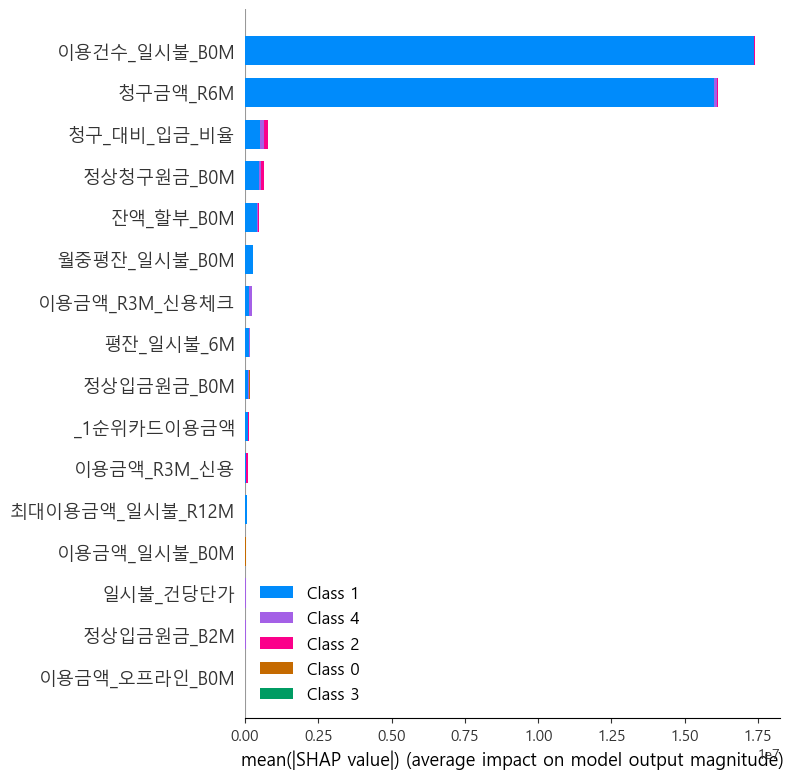

In [207]:
import shap
import pandas as pd

# 2000Í∞ú ÏÉòÌîå + Ïª¨ÎüºÎ™Ö Î∂ôÏù¥Í∏∞
X_sample = pd.DataFrame(X_test[:2000], columns=X.columns)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, plot_type='bar')

### ÏÑ∏Í∑∏Î®ºÌä∏ Î≥Ñ ÏÑ±Îä• ÏÉÅÏÑ∏ Î¶¨Ìè¨Ìä∏

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.51      0.50       202
           1       0.15      0.23      0.18        31
           2       0.63      0.52      0.57     25157
           3       0.57      0.51      0.54     68099
           4       0.91      0.94      0.92    350990

    accuracy                           0.85    444479
   macro avg       0.55      0.54      0.54    444479
weighted avg       0.84      0.85      0.84    444479



### Î™®Îç∏Ïùò ÏïàÏ†ïÏÑ± ÌèâÍ∞Ä

In [211]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# StratifiedKFoldÎ°ú ÌÅ¥ÎûòÏä§ ÎπÑÏú® Ïú†ÏßÄÌïòÎ©∞ 3Í≤π Î∂ÑÌï†
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

acc_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"Fold {fold+1} ÏãúÏûë")

    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    model = lgb.LGBMClassifier(**study.best_params)  # ÌäúÎãùÎêú ÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïö©
    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.predict(X_val_fold)
    acc = accuracy_score(y_val_fold, y_pred_fold)
    acc_scores.append(acc)

    print(f"Fold {fold+1} Ï†ïÌôïÎèÑ: {acc:.4f}")

print(f"\nÏ†ÑÏ≤¥ ÌèâÍ∑† Ï†ïÌôïÎèÑ: {np.mean(acc_scores):.4f} ¬± {np.std(acc_scores):.4f}")

Fold 1 ÏãúÏûë
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3916
[LightGBM] [Info] Number of data points in the train set: 1481596, number of used features: 16
[LightGBM] [Info] Start training from score -7.747162
[LightGBM] [Info] Start training from score -9.644282
[LightGBM] [Info] Start training from score -2.871917
[LightGBM] [Info] Start training from score -1.870583
[LightGBM] [Info] Start training from score -0.237142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

- Ïò§Ï∞®Î≤îÏúÑ ¬± 0.01Î°ú ÍΩ§ÎÇò ÏïàÏ†ïÏÑ± ÏûàÏùå

In [213]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# StratifiedKFold: ÌÅ¥ÎûòÏä§ ÎπÑÏú® Ïú†ÏßÄÌïòÎ©∞ n_splits=3 (Ï°∞Ï†ï Í∞ÄÎä•)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

acc_scores = []
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"Fold {fold+1} ÏãúÏûë")

    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    model = lgb.LGBMClassifier(**study.best_params)  # ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
    model.fit(X_train_fold, y_train_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§Ïö© Í∞ÄÏ§ëÌèâÍ∑†

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold+1} Ï†ïÌôïÎèÑ: {acc:.4f}, F1-score: {f1:.4f}")

print(f"\nÏ†ÑÏ≤¥ ÌèâÍ∑† Ï†ïÌôïÎèÑ: {np.mean(acc_scores):.4f} ¬± {np.std(acc_scores):.4f}")
print(f"Ï†ÑÏ≤¥ ÌèâÍ∑† F1-score: {np.mean(f1_scores):.4f} ¬± {np.std(f1_scores):.4f}")

Fold 1 ÏãúÏûë
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3916
[LightGBM] [Info] Number of data points in the train set: 1481596, number of used features: 16
[LightGBM] [Info] Start training from score -7.747162
[LightGBM] [Info] Start training from score -9.644282
[LightGBM] [Info] Start training from score -2.871917
[LightGBM] [Info] Start training from score -1.870583
[LightGBM] [Info] Start training from score -0.237142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [215]:
import joblib

# ÌïôÏäµ ÏôÑÎ£åÎêú Î™®Îç∏Ïù¥ model Î≥ÄÏàòÏóê ÏûàÏùÑ Îïå
joblib.dump(model, 'best_model1.pkl')

['best_model1.pkl']

In [229]:
import pandas as pd
import joblib

# 1) Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

# 2) ÌÖåÏä§Ìä∏ ÌöåÏõêÏ†ïÎ≥¥ ÌååÏùº Í≤ΩÎ°ú
test_member_paths = [
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201807_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201808_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201809_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201810_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201811_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201812_test_ÌöåÏõêÏ†ïÎ≥¥.parquet",
]

# 3) ÌöåÏõê ID ÌÜµÌï©
df_test_members = pd.concat([pd.read_parquet(p)[['ID']] for p in test_member_paths])
df_test_members = df_test_members.drop_duplicates()

# 4) ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Ìï† Ïª¨Îüº Î∞è ÌååÏùº
file_columns_test = {
   "open/test/1.ÌöåÏõêÏ†ïÎ≥¥/201812_test_ÌöåÏõêÏ†ïÎ≥¥.parquet": [
        'ID', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°'
    ],
    "open/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201807_test_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet": [
        'ID', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
        'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'
    ],
    "open/test/4.Ï≤≠Íµ¨ÏûÖÍ∏àÏ†ïÎ≥¥/201807_test_Ï≤≠Íµ¨Ï†ïÎ≥¥.parquet": [
        'ID', 'Ï≤≠Íµ¨Í∏àÏï°_R6M'
    ],
    "open/test/5.ÏûîÏï°Ï†ïÎ≥¥/201807_test_ÏûîÏï°Ï†ïÎ≥¥.parquet": [
        'ID', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M'
    ]
}

# 5) Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
data_chunks_test = []
for path, cols in file_columns_test.items():
    df = pd.read_parquet(path, columns=cols)
    if data_chunks_test:
        existing_cols = set().union(*[set(d.columns) for d in data_chunks_test])
        overlap = [col for col in df.columns if col in existing_cols and col != 'ID']
        df = df.drop(columns=overlap)
    data_chunks_test.append(df)

data_merged_test = data_chunks_test[0]
for df in data_chunks_test[1:]:
    data_merged_test = pd.merge(data_merged_test, df, on='ID', how='inner')

# 6) ÌöåÏõê IDÏôÄ Î≥ëÌï©
full_test_df = pd.merge(data_merged_test, df_test_members, on='ID', how='inner')

# 7) ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± (ÌïôÏäµ ÎïåÏôÄ ÎèôÏùº)
full_test_df['ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä'] = full_test_df['Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M'] / (full_test_df['Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M'] + 1)
full_test_df['Ï≤≠Íµ¨_ÎåÄÎπÑ_ÏûÖÍ∏à_ÎπÑÏú®'] = full_test_df['Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M'] / (full_test_df['Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M'] + 1)

# 8) ÌïôÏäµ Ïãú ÏÇ¨Ïö©Ìïú Ïª¨Îüº Î¶¨Ïä§Ìä∏ (ÌååÏÉùÎ≥ÄÏàò Ìè¨Ìï®, ÏàúÏÑú ÎèôÏùºÌïòÍ≤å)
feature_columns = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M',
    'ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä', 'Ï≤≠Íµ¨_ÎåÄÎπÑ_ÏûÖÍ∏à_ÎπÑÏú®'
]

# 9) ÎàÑÎùΩ Ïª¨Îüº 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞ Î∞è Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
for col in feature_columns:
    if col not in full_test_df.columns:
        full_test_df[col] = 0

# inf, -inf -> NaN Î≥ÄÌôò
full_test_df[feature_columns] = full_test_df[feature_columns].replace([float('inf'), -float('inf')], pd.NA)

# NaN Ï±ÑÏö∞Í∏∞ (0 ÎòêÎäî Ï†ÅÏ†àÌïú Í∞í)
full_test_df[feature_columns] = full_test_df[feature_columns].fillna(0)

# (ÏÑ†ÌÉù) ÎÑàÎ¨¥ ÌÅ∞ Í∞í ÌÅ¥Î¶¨Ìïë (Ïòà: ¬±1e10) - ÌïÑÏöî ÏóÜÏúºÎ©¥ ÎπºÎèÑ Îê®
max_val = 1e10
full_test_df[feature_columns] = full_test_df[feature_columns].clip(lower=-max_val, upper=max_val)

# 10) Î™®Îç∏ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïª¨Îüº ÏàúÏÑú ÏôÑÎ≤Ω ÏùºÏπò)
X_test = full_test_df.loc[:, feature_columns]

# 11) Ïä§ÏºÄÏùºÎßÅ
X_test_scaled = scaler.transform(X_test)

# 12) ÏòàÏ∏°
preds = model.predict(X_test_scaled)

# 13) Í≤∞Í≥º Ï†ÄÏû•
result = full_test_df[['ID']].copy()
result['prediction'] = preds
result = result.drop_duplicates(subset='ID')

# 14) Ïà´Ïûê ‚Üí ÏïåÌååÎ≤≥ Î≥ÄÌôò
code_to_alpha = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
result['prediction'] = result['prediction'].map(code_to_alpha)

result.to_csv('test_predictions_alpha1.csv', index=False)
print("‚úÖ ÏòàÏ∏° ÏôÑÎ£å Î∞è Ï†ÄÏû• ‚Üí test_predictions_alpha1.csv")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29264\2581836932.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_test_df[feature_columns] = full_test_df[feature_columns].fillna(0)


‚úÖ ÏòàÏ∏° ÏôÑÎ£å Î∞è Ï†ÄÏû• ‚Üí test_predictions_alpha1.csv


In [231]:
# ÌöåÏõêÏ†ïÎ≥¥ ÌååÏùºÎì§ Îã§Ïãú Î∂àÎü¨Ïò§Í∏∞ (train Í∏∞Ï§Ä)
member_paths = [
    
    "open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
]

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# SegmentÎßå Î∂àÎü¨ÏôÄÏÑú LabelEncoder Î≥µÏõê
df_members = pd.concat([pd.read_parquet(p)[['Segment']] for p in member_paths])
le = LabelEncoder()
le.fit(df_members['Segment'])

# Ï†ÄÏû•
joblib.dump(le, 'label_encoder.pkl')

print("‚úÖ LabelEncoder Î≥µÏõê Î∞è Ï†ÄÏû• ÏôÑÎ£å")

‚úÖ LabelEncoder Î≥µÏõê Î∞è Ï†ÄÏû• ÏôÑÎ£å


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29264\1118548340.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


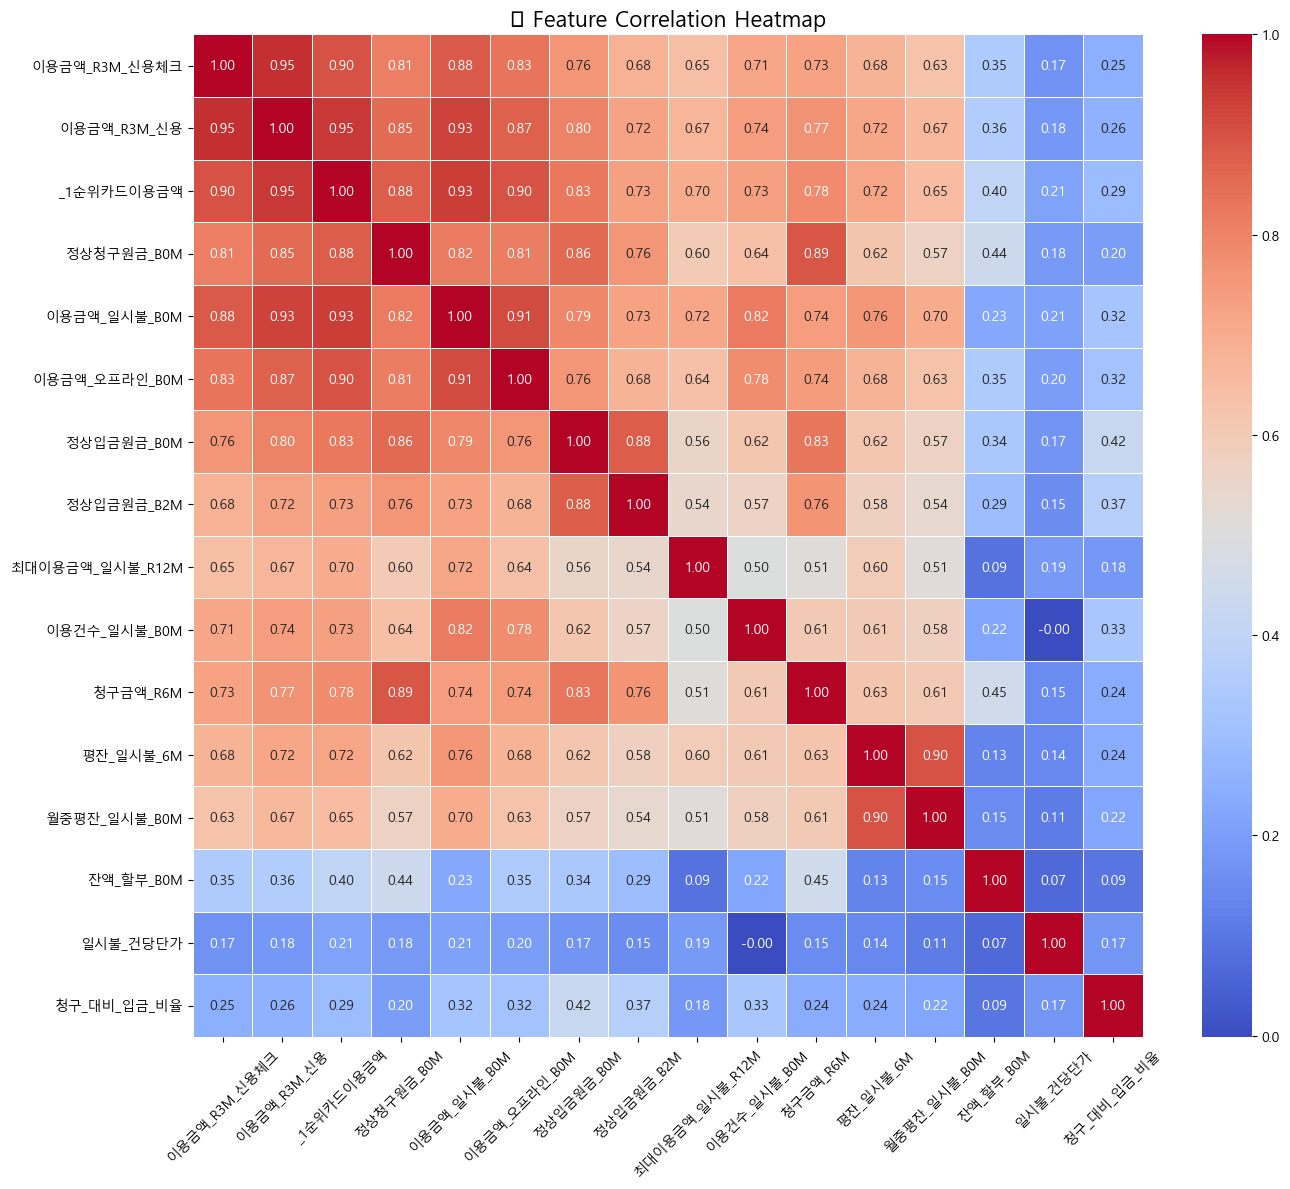

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌñàÎçò ÌîºÏ≤òÎì§Îßå ÏÑ†ÌÉù
# (full_dfÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Í∞ÄÏ†ï)
selected_columns = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M',
    'ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä', 'Ï≤≠Íµ¨_ÎåÄÎπÑ_ÏûÖÍ∏à_ÎπÑÏú®'
]

# 2. Ìï¥Îãπ ÌîºÏ≤òÎì§Îßå Ï∂îÏ∂ú
df_corr = full_df[selected_columns].copy()

# 3. ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_corr.corr()

# 4. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("üìä Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [237]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 1. full_dfÏóêÏÑú ÌîºÏ≤òÎì§Îßå Ï∂îÏ∂ú
selected_columns = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M',
    'ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä', 'Ï≤≠Íµ¨_ÎåÄÎπÑ_ÏûÖÍ∏à_ÎπÑÏú®'
]

X_vif = full_df[selected_columns].copy()

# 2. inf, -infÎ•º NaNÏúºÎ°ú Î≥ÄÌôò
X_vif.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. NaN Ìñâ Ï†úÍ±∞
X_vif.dropna(inplace=True)

# 4. VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 5. Í≤∞Í≥º Ï†ïÎ†¨ Î∞è Ï∂úÎ†•
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

            feature        VIF
4      Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M  35.078454
1       Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©  33.473723
2        _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°  30.993400
0     Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨  17.729976
3        Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M  16.090562
6        Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M  12.589999
5     Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M  12.561710
10         Ï≤≠Íµ¨Í∏àÏï°_R6M   9.481978
11        ÌèâÏûî_ÏùºÏãúÎ∂à_6M   8.887569
12     ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M   7.193973
7        Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M   6.686198
9      Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M   6.271768
8   ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M   3.335064
15      Ï≤≠Íµ¨_ÎåÄÎπÑ_ÏûÖÍ∏à_ÎπÑÏú®   2.595406
13        ÏûîÏï°_Ìï†Î∂Ä_B0M   2.212230
14         ÏùºÏãúÎ∂à_Í±¥ÎãπÎã®Í∞Ä   1.557460


In [1]:
import shap
import pandas as pd

# (1) ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂Ä ÏÉòÌîåÎßÅ (Ïòà: 2000Í∞ú)
X_sample = pd.DataFrame(X_test[:2000], columns=X.columns)

# (2) SHAP ÏÑ§Î™ÖÍ∏∞ ÏÉùÏÑ± (LightGBM Îì± tree Í∏∞Î∞ò Î™®Îç∏ Ï†ÑÏö©)
explainer = shap.TreeExplainer(best_model)

# (3) SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_sample)

# (4) SHAP Ï†êÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (Ïª¨Îü¨ Ï†êÎì§Î°ú ÏòÅÌñ•Î†•Í≥º Î∞©Ìñ•ÏÑ± ÌëúÌòÑ)
shap.summary_plot(shap_values, X_sample)

NameError: name 'X_test' is not defined

In [35]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞
df1 = pd.read_parquet("open/train/4.Ï≤≠Íµ¨ÏûÖÍ∏àÏ†ïÎ≥¥/201812_train_Ï≤≠Íµ¨Ï†ïÎ≥¥.parquet")
df2 = pd.read_parquet("open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201812_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet")
df3 = pd.read_parquet("open/train/5.ÏûîÏï°Ï†ïÎ≥¥/201812_train_ÏûîÏï°Ï†ïÎ≥¥.parquet")
df4 = pd.read_parquet("open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet")

# 2. ID Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (suffixÎ°ú Ï§ëÎ≥µ Ïª¨Îüº Íµ¨Î∂Ñ)
merged_df = df1.merge(df2, on='ID', how='inner', suffixes=('_Ï≤≠Íµ¨', '_ÏäπÏù∏')) \
               .merge(df3, on='ID', how='inner', suffixes=('', '_ÏûîÏï°'))

# 3. ÌöåÏõêÏ†ïÎ≥¥ Î≥ëÌï© Ï†Ñ Ï§ëÎ≥µ Ïª¨Îüº Ï†úÍ±∞ (Í∏∞Ï§ÄÎÖÑÏõî Ï†úÏô∏)
df4_drop = df4.drop(columns=['Í∏∞Ï§ÄÎÖÑÏõî'])

# 4. ÌöåÏõêÏ†ïÎ≥¥ Î≥ëÌï© (Í∏∞Ï§ÄÎÖÑÏõî Ïª¨Îüº Ï†úÏô∏ÌñàÏúºÎãà suffix Ïïà Ï§òÎèÑ Îê®)
merged_df = merged_df.merge(df4_drop, on='ID', how='inner')

# 5. Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print(merged_df.columns)

# 6. ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï (Ïª¨ÎüºÎ™ÖÏùÄ Ï∂úÎ†• Í≤∞Í≥º Î≥¥Í≥† ÏàòÏ†ïÌïòÏÑ∏Ïöî)
X = merged_df[[
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M',
    'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M',
    'ÏûîÏï°_Ìï†Î∂Ä_B0M','_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M','Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M'
]]
y = merged_df['Segment']

# 7. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
df_corr = X.copy()
df_corr['Segment'] = y

# SegmentÍ∞Ä Î¨∏ÏûêÌòïÏùº Í≤ΩÏö∞ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
if df_corr['Segment'].dtype == 'object':
    df_corr['Segment'] = df_corr['Segment'].astype('category').cat.codes

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
df_numeric = df_corr.select_dtypes(include=['number'])

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
spearman_corr = df_numeric.corr(method='spearman')

# 8. Í≤∞Í≥º Ï∂úÎ†•
print(spearman_corr['Segment'].sort_values(ascending=False))

Index(['Í∏∞Ï§ÄÎÖÑÏõî_Ï≤≠Íµ¨', 'ID', 'ÎåÄÌëúÍ≤∞Ï†úÏùº', 'ÎåÄÌëúÍ≤∞Ï†úÎ∞©Î≤ïÏΩîÎìú', 'ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú', 'ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú',
       'Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M',
       ...
       'Ìï†Ïù∏Í∏àÏï°_Ï†úÌú¥Ïó∞ÌöåÎπÑ_B0M', 'Ï≤≠Íµ¨Í∏àÏï°_Í∏∞Î≥∏Ïó∞ÌöåÎπÑ_B0M', 'Ï≤≠Íµ¨Í∏àÏï°_Ï†úÌú¥Ïó∞ÌöåÎπÑ_B0M', 'ÏÉÅÌíàÍ¥ÄÎ†®Î©¥Ï†úÏπ¥ÎìúÏàò_B0M',
       'ÏûÑÏßÅÏõêÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Ïö∞ÏàòÌöåÏõêÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Í∏∞ÌÉÄÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Ïπ¥ÎìúÏã†Ï≤≠Í±¥Ïàò', 'Life_Stage',
       'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî'],
      dtype='object', length=608)
Segment            1.000000
ÏûîÏï°_Ìï†Î∂Ä_B0M         -0.217810
ÏûîÏï°_Ìï†Î∂Ä_B0M         -0.217810
Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_B0M       -0.219851
_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°        -0.348874
Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M      -0.385579
Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M        -0.406835
Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M        -0.409139
ÌèâÏûî_ÏùºÏãúÎ∂à_6M         -0.425189

In [37]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞
df1 = pd.read_parquet("open/train/4.Ï≤≠Íµ¨ÏûÖÍ∏àÏ†ïÎ≥¥/201812_train_Ï≤≠Íµ¨Ï†ïÎ≥¥.parquet")
df2 = pd.read_parquet("open/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥/201812_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet")
df3 = pd.read_parquet("open/train/5.ÏûîÏï°Ï†ïÎ≥¥/201812_train_ÏûîÏï°Ï†ïÎ≥¥.parquet")
df4 = pd.read_parquet("open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet")

# 2. ID Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (suffixÎ°ú Ï§ëÎ≥µ Ïª¨Îüº Íµ¨Î∂Ñ)
merged_df = df1.merge(df2, on='ID', how='inner', suffixes=('_Ï≤≠Íµ¨', '_ÏäπÏù∏')) \
               .merge(df3, on='ID', how='inner', suffixes=('', '_ÏûîÏï°'))

# 3. ÌöåÏõêÏ†ïÎ≥¥ Î≥ëÌï© Ï†Ñ Ï§ëÎ≥µ Ïª¨Îüº Ï†úÍ±∞ (Í∏∞Ï§ÄÎÖÑÏõî Ï†úÏô∏)
df4_drop = df4.drop(columns=['Í∏∞Ï§ÄÎÖÑÏõî'])

# 4. ÌöåÏõêÏ†ïÎ≥¥ Î≥ëÌï© (Í∏∞Ï§ÄÎÖÑÏõî Ïª¨Îüº Ï†úÏô∏ÌñàÏúºÎãà suffix Ïïà Ï§òÎèÑ Îê®)
merged_df = merged_df.merge(df4_drop, on='ID', how='inner')

# 5. Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print(merged_df.columns)

# 6. ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï (Ïª¨ÎüºÎ™ÖÏùÄ Ï∂úÎ†• Í≤∞Í≥º Î≥¥Í≥† ÏàòÏ†ïÌïòÏÑ∏Ïöî)
X = merged_df[[
  'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M', 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M',
]]
y = merged_df['Segment']

# 7. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
df_corr = X.copy()
df_corr['Segment'] = y

# SegmentÍ∞Ä Î¨∏ÏûêÌòïÏùº Í≤ΩÏö∞ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
if df_corr['Segment'].dtype == 'object':
    df_corr['Segment'] = df_corr['Segment'].astype('category').cat.codes

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
df_numeric = df_corr.select_dtypes(include=['number'])

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
spearman_corr = df_numeric.corr(method='spearman')

# 8. Í≤∞Í≥º Ï∂úÎ†•
print(spearman_corr['Segment'].sort_values(ascending=False))

Index(['Í∏∞Ï§ÄÎÖÑÏõî_Ï≤≠Íµ¨', 'ID', 'ÎåÄÌëúÍ≤∞Ï†úÏùº', 'ÎåÄÌëúÍ≤∞Ï†úÎ∞©Î≤ïÏΩîÎìú', 'ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú', 'ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú',
       'Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M',
       ...
       'Ìï†Ïù∏Í∏àÏï°_Ï†úÌú¥Ïó∞ÌöåÎπÑ_B0M', 'Ï≤≠Íµ¨Í∏àÏï°_Í∏∞Î≥∏Ïó∞ÌöåÎπÑ_B0M', 'Ï≤≠Íµ¨Í∏àÏï°_Ï†úÌú¥Ïó∞ÌöåÎπÑ_B0M', 'ÏÉÅÌíàÍ¥ÄÎ†®Î©¥Ï†úÏπ¥ÎìúÏàò_B0M',
       'ÏûÑÏßÅÏõêÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Ïö∞ÏàòÌöåÏõêÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Í∏∞ÌÉÄÎ©¥Ï†úÏπ¥ÎìúÏàò_B0M', 'Ïπ¥ÎìúÏã†Ï≤≠Í±¥Ïàò', 'Life_Stage',
       'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî'],
      dtype='object', length=608)
Segment            1.000000
ÏûîÏï°_Ìï†Î∂Ä_B0M         -0.217810
Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M      -0.385579
Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M        -0.406835
Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M        -0.409139
ÌèâÏûî_ÏùºÏãúÎ∂à_6M         -0.425189
ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M      -0.429999
Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M      -0.455815
ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M  

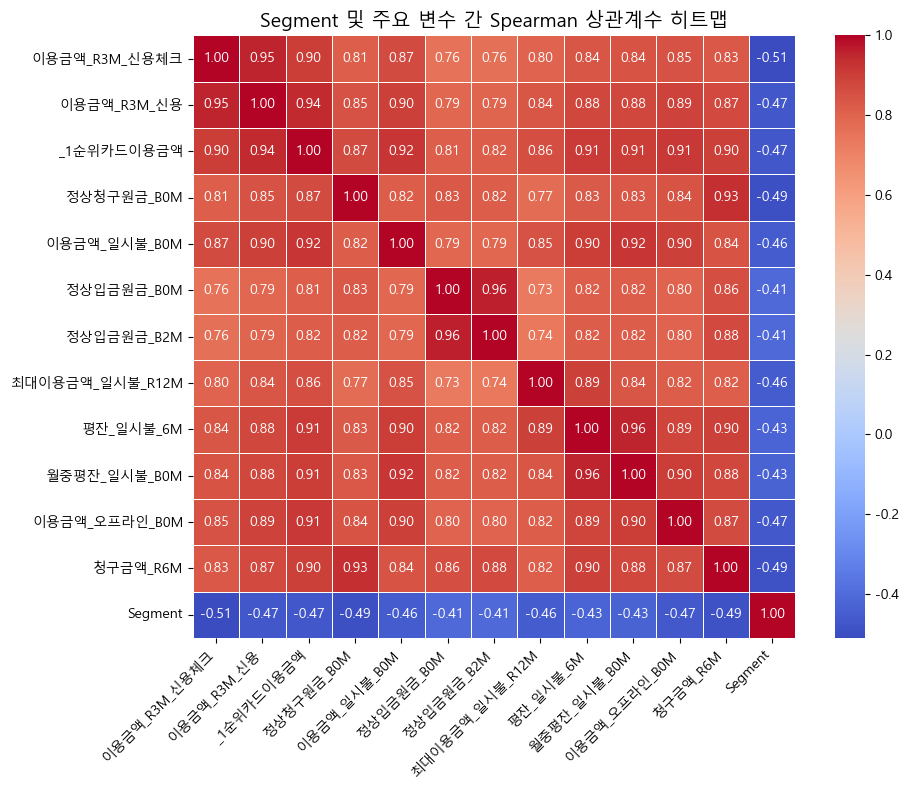

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# 1. Segment Î≤îÏ£ºÌòïÏù¥Î©¥ Ïà´ÏûêÎ°ú Î≥ÄÌôò
if merged_df['Segment'].dtype == 'object':
    merged_df['Segment'] = merged_df['Segment'].astype('category').cat.codes

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº Î¶¨Ïä§Ìä∏
candidate_features = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M',
    'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M',
    'ÏûîÏï°_Ìï†Î∂Ä_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
    'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'ÏûîÏï°_Ìï†Î∂Ä_B0M', 'Segment'
]

# 3. Ïà´ÏûêÌòï ÌïÑÌÑ∞ÎßÅ ÌõÑ Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
df_corr = merged_df[candidate_features].copy()
df_numeric = df_corr.select_dtypes(include=['number'])
spearman_corr = df_numeric.corr(method='spearman')

# 4. Segment Í∏∞Ï§ÄÏúºÎ°ú Ï†àÎåÄÍ∞í ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.4 Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ
strong_corr_cols = spearman_corr['Segment'][abs(spearman_corr['Segment']) > 0.4].index.tolist()

# 5. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr.loc[strong_corr_cols, strong_corr_cols],
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Segment Î∞è Ï£ºÏöî Î≥ÄÏàò Í∞Ñ Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù Î∞è Î≥µÏÇ¨
numeric_df = merged_df.select_dtypes(include=['number']).copy()

# inf Í∞í Ï≤òÎ¶¨
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
numeric_df.dropna(axis=0, inplace=True)

# Î∂ÑÏÇ∞ 0Ïù∏ Ïª¨Îüº Ï†úÍ±∞
zero_var_cols = numeric_df.columns[numeric_df.var() == 0]
if len(zero_var_cols) > 0:
    print("Î∂ÑÏÇ∞ 0Ïù∏ Ïª¨Îüº Ï†úÍ±∞:", list(zero_var_cols))
    numeric_df.drop(columns=zero_var_cols, inplace=True)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# VIF 5 Ïù¥Ìïò ÌïÑÌÑ∞ÎßÅ Î∞è Ï∂úÎ†•
vif_below_5 = vif_data[vif_data['VIF'] <= 5]
print(vif_below_5)

Î∂ÑÏÇ∞ 0Ïù∏ Ïª¨Îüº Ï†úÍ±∞: ['Í∏∞Ï§ÄÎÖÑÏõî_Ï≤≠Íµ¨', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M', 'Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_Í±¥Î≥Ñ_B0M', 'Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_Í±¥Î≥Ñ_R3M', 'Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_ÏõîÏ†ÅÎ¶Ω_B0M', 'Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_ÏõîÏ†ÅÎ¶Ω_R3M', 'Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_ÏõîÏ†ÅÎ¶Ω_B0M', 'Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_ÏõîÏ†ÅÎ¶Ω_R3M', 'Ìè¨Ïù∏Ìä∏_ÏûîÏó¨Ìè¨Ïù∏Ìä∏_B0M', 'ÎßàÏùº_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R12M', 'ÎßàÏùº_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R3M', 'ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M', 'ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M', 'ÎßàÏùº_ÏûîÏó¨Ìè¨Ïù∏Ìä∏_B0M', 'Ìï†Ïù∏Í∏àÏï°_R3M', 'Ìï†Ïù∏Í∏àÏï°_B0M', 'Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_R3M', 'Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_B0M', 'ÏÉÅÌôòÍ∞úÏõîÏàò_Í≤∞Ï†úÏùº_R3M', 'ÏÑ†Í≤∞Ï†úÍ±¥Ïàò_R6M', 'ÏÑ†Í≤∞Ï†úÍ±¥Ïàò_R3M', 'Ïó∞Ï≤¥Í±¥Ïàò_R3M', 'Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_ÌôòÏÇ∞_B0M', 'ÌòúÌÉùÏàòÌòúÍ∏àÏï°', 'Í∏∞Ï§ÄÎÖÑÏõî_ÏäπÏù∏', 'Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_B0M', 'Ïù¥Ïö©Í±¥Ïàò_CA_B0M', 'Ïù¥Ïö©Í±

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Empty DataFrame
Columns: [feature, VIF]
Index: []


In [55]:
print(numeric_df.nunique())
print(numeric_df.isna().sum())
print(numeric_df.iloc[:, :5].head(10))

ÎåÄÌëúÍ≤∞Ï†úÏùº                 2
Ï≤≠Íµ¨Í∏àÏï°_B0               3
Ï≤≠Íµ¨Í∏àÏï°_R3M              3
Ï≤≠Íµ¨Í∏àÏï°_R6M              3
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_Í±¥Î≥Ñ_B0M        2
                     ..
Ïù¥Ïö©Ïó¨Î∂Ä_3M_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏       2
Î≥¥Ïú†Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏       2
Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏     2
Ïù¥Ïö©Ïó¨Î∂Ä_3M_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏    2
ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî             3
Length: 225, dtype: int64
ÎåÄÌëúÍ≤∞Ï†úÏùº                 0
Ï≤≠Íµ¨Í∏àÏï°_B0               0
Ï≤≠Íµ¨Í∏àÏï°_R3M              0
Ï≤≠Íµ¨Í∏àÏï°_R6M              0
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_Í±¥Î≥Ñ_B0M        0
                     ..
Ïù¥Ïö©Ïó¨Î∂Ä_3M_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏       0
Î≥¥Ïú†Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏       0
Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏     0
Ïù¥Ïö©Ïó¨Î∂Ä_3M_Ìï¥Ïô∏Í≤∏Ïö©_Ïã†Ïö©_Î≥∏Ïù∏    0
ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî             0
Length: 225, dtype: int64
        ÎåÄÌëúÍ≤∞Ï†úÏùº  Ï≤≠Íµ¨Í∏àÏï°_B0  Ï≤≠Íµ¨Í∏àÏï°_R3M  Ï≤≠Íµ¨Í∏àÏï°_R6M  Ìè¨Ïù∏Ìä∏_Ìè¨Ï

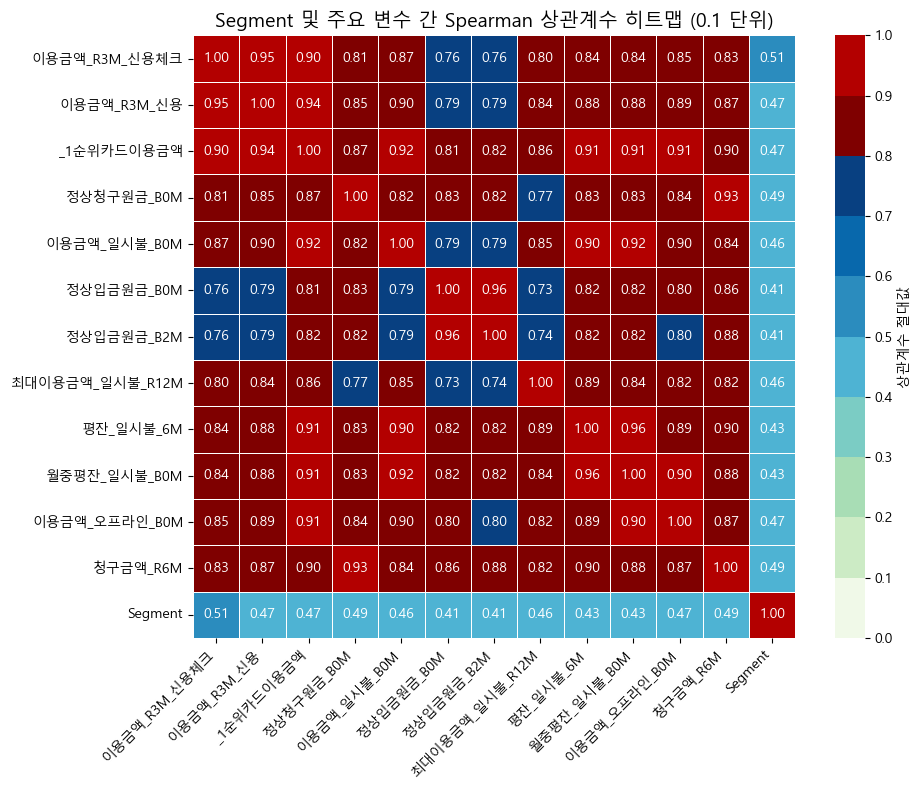

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Segment Î≥ÄÌôò
if merged_df['Segment'].dtype == 'object':
    merged_df['Segment'] = merged_df['Segment'].astype('category').cat.codes

# ÌõÑÎ≥¥ Î≥ÄÏàò
candidate_features = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°',
    'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_B0M',
    'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M',
    'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_B0M', 'ÌèâÏûî_ÏùºÏãúÎ∂à_6M', 'ÏõîÏ§ëÌèâÏûî_ÏùºÏãúÎ∂à_B0M',
    'ÏûîÏï°_Ìï†Î∂Ä_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M', 'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'Segment'
]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
df_corr = merged_df[candidate_features].copy()
df_corr = df_corr.select_dtypes(include=['number'])
spearman_corr = df_corr.corr(method='spearman')

# Ï†àÎåÄÍ∞í ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.4 Ïù¥ÏÉÅÎßå ÌïÑÌÑ∞ÎßÅ
strong_corr_cols = spearman_corr.loc[abs(spearman_corr['Segment']) > 0.4].index.tolist()

# ÏÉâÏÉÅ Î≤îÏúÑ Î∞è Ïª¨Îü¨Îßµ (0.1 Í∞ÑÍ≤©)
bounds = [i / 10 for i in range(11)]  # [0.0, 0.1, ..., 1.0]
colors = [
    '#f0f9e8', '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3',
    '#2b8cbe', '#0868ac', '#084081', '#7f0000', '#b30000'
]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr.loc[strong_corr_cols, strong_corr_cols].abs(),
    cmap=cmap,
    norm=norm,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={'ticks': bounds, 'label': 'ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†àÎåÄÍ∞í'}
)
plt.title('Segment Î∞è Ï£ºÏöî Î≥ÄÏàò Í∞Ñ Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ (0.1 Îã®ÏúÑ)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()